In [152]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

1. Загрузить файл в датафрейм

In [4]:
df=pd.read_csv("HR.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2. Основные статистики для переменных

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [205]:
print(df.Work_accident.value_counts())
print('----------------------------------')
print(df.promotion_last_5years.value_counts())
print('----------------------------------')
print(df.time_spend_company.value_counts())
print('----------------------------------')
print(df.number_project.value_counts().sort_index())
print('----------------------------------')
print('Модальное значение: ')
print(df.mode())
print('----------------------------------')
print('Медианы: ')
med = df.drop(df.columns[[5, 6, 7, 8, 9]], axis=1) 
print(med.median())

0    12830
1     2169
Name: Work_accident, dtype: int64
----------------------------------
0    14680
1      319
Name: promotion_last_5years, dtype: int64
----------------------------------
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64
----------------------------------
2    2388
3    4055
4    4365
5    2761
6    1174
7     256
Name: number_project, dtype: int64
----------------------------------
Модальное значение: 
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                 3.0            0.0   0.0                    0.0      sales   
1                 NaN            NaN   NaN                    NaN        NaN   

  salary  
0   

3. Корреляционная матрица для количественных величин

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


<AxesSubplot:>

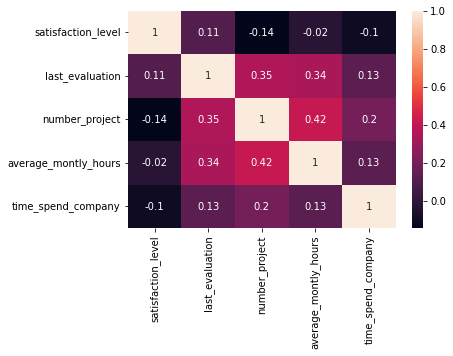

In [6]:
columns = ['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']
corr_matrix = df.loc[:,columns].corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)

Из всех количественных величин наиболее коррелируют (что логично) - это количество проектов и количество времени проведённых на работе. Наименее скоррелированные величины это удовлетворенность сотрудника и количество часов на рабочем месте.

4. Рассчитать сколько сотрудников работает в каждом департаменте

In [7]:
#также указываю в процентном соотношении
print(df.department.value_counts())
print(df.department.value_counts().div(len(df)).mul(100))

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: department, dtype: float64


5. Показать распределение сотрудников по зарплатам.

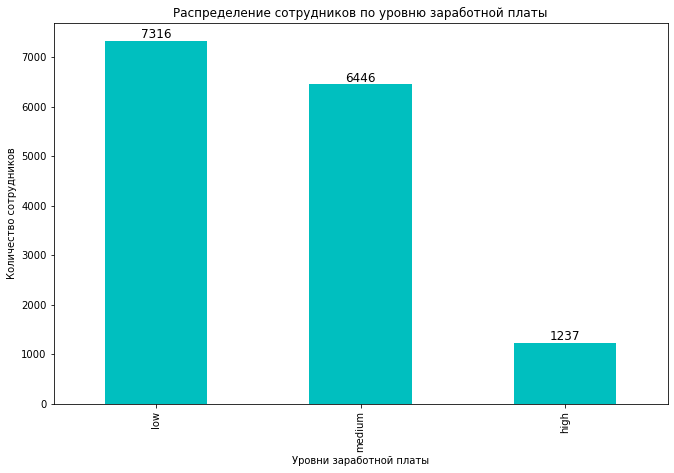

In [178]:
salary_level = df.salary.value_counts()
salary_level.plot(kind='bar', title='Распределение сотрудников по уровню заработной платы', \
                  xlabel='Уровни заработной платы', ylabel='Количество сотрудников', color='c', width = 0.5)
for i, val in enumerate(salary_level):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':12})

6. Показать распределение сотрудников по зарплатам в каждом департаменте.

In [167]:
salary_in_departments = df.groupby(['department', 'salary'])[['satisfaction_level']].count()
salary_in_departments.columns = ['amount']
salary_in_departments = salary_in_departments.unstack().amount
salary_in_departments

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


<AxesSubplot:title={'center':'Распределение сотрудников по уровню заработной платы'}, xlabel='Уровни заработной платы по отделам', ylabel='Количество сотрудников'>

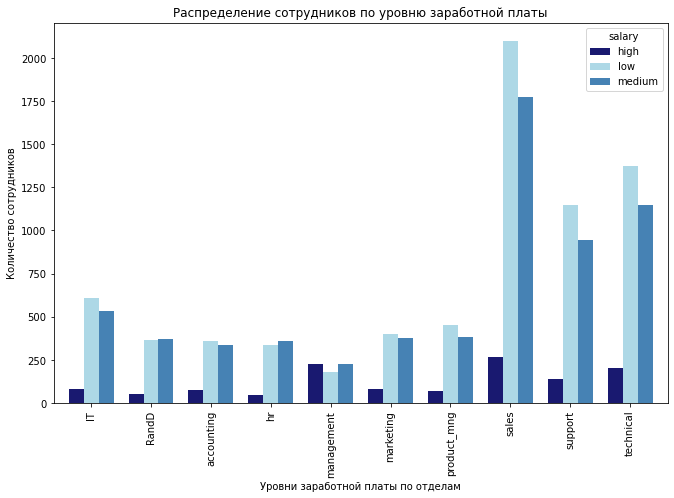

In [176]:
salary_in_departments.plot(kind='bar', title='Распределение сотрудников по уровню заработной платы', \
                 xlabel='Уровни заработной платы по отделам', ylabel='Количество сотрудников',\
                 color={'low':'lightblue',\
           'medium':'steelblue', 'high':'midnightblue'}, width = 0.75)

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [181]:
df_low = df[df['salary'] == 'low']['average_montly_hours']
df_high = df[df['salary'] == 'high']['average_montly_hours']

Переформилирую гипотезу и проверю равенство медиан, что позволит утверждать, что сотрудники с высоким окладом проводят времени на работе столько же, сколько и сотрудники с низким окладом.
Соответственно Н0: m1 = m2 

In [ ]:
from scipy import stats

In [183]:
result = stats.mannwhitneyu(df_low, df_high)
print('p-value: {0}'.format(result[1]))

p-value: 0.8241330720858693


Так как значение очень велико нет основания отвергнуть гипотезу, соответственно делаем вывод, что уровень зарплаты незначительно влияет на количество времени, проведённое на работе.

8. Рассчитать показатели среди уволившихся и не уволившихся сотрудников:
-доля сотрудников с повышением за последние 5 лет

-средняя степень удовлетворенности

-среднее количество проектов

In [17]:
df_left = df.loc[df['left'] == 1]
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников, в %: ', \
      df_left.promotion_last_5years.value_counts().div(len(df_left)).mul(100)[1])
print('Средняя степень удовлетворенности среди уволившихся сотрудников: ', df_left.satisfaction_level.median())
print('Среднее количество проектов среди уволившихся сотрудников: ', df_left.number_project.median())

Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников, в %:  0.5320638476617194
Средняя степень удовлетворенности среди уволившихся сотрудников:  0.41
Среднее количество проектов среди уволившихся сотрудников:  4.0


In [18]:
df_not_left = df.loc[df['left'] == 0]
print('Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников, в %: ', \
      df_not_left.promotion_last_5years.value_counts().div(len(df_not_left)).mul(100)[1])
print('Средняя степень удовлетворенности среди не уволившихся сотрудников: ', df_not_left.satisfaction_level.median())
print('Среднее количество проектов среди не уволившихся сотрудников: ', df_not_left.number_project.median())

Доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников, в %:  2.6251312565628284
Средняя степень удовлетворенности среди не уволившихся сотрудников:  0.69
Среднее количество проектов среди не уволившихся сотрудников:  4.0


9. Построить LDA, предсказывающую уволился ли сотрудник (не учитывать department и salary)

Оценить качество модели на тестовой выборке.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [14]:
df2 = df.drop(df.columns[[8, 9]], axis=1) 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df2, df2['left'], test_size=0.2)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
len(y_test)

3000

In [24]:
accuracy_score(y_test, y_pred)

0.753

In [19]:
print(df.left.value_counts())
print(df.left.value_counts().div(len(df)).mul(100))

0    11428
1     3571
Name: left, dtype: int64
0    76.191746
1    23.808254
Name: left, dtype: float64


Метрика качества accuracy не подходит для определения качества модели, так как количество уволившихся и не уволившихся сотрудников распределено неравномерно.

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
#матрица ошибок
r = sklearn.metrics.confusion_matrix(y_test, y_pred)
r = np.flip(r)
print(r)

[[ 164  562]
 [ 179 2095]]


In [55]:
precision = sklearn.metrics.precision_score(y_test, y_pred)
print(precision)

0.478134110787172


In [56]:
recall = sklearn.metrics.recall_score(y_test, y_pred)
print(recall)

0.22589531680440772


In [57]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.92      0.85      2274\n           1       0.48      0.23      0.31       726\n\n    accuracy                           0.75      3000\n   macro avg       0.63      0.57      0.58      3000\nweighted avg       0.71      0.75      0.72      3000\n'

Наша модель допускает довольно много ошибок, несмотря на то, что из общего количества тестовой выборки верных предсказаний 75% (Хотя и этот показатель довольно мал. Каждое четвертое предсказание ошибочно). 
Показатель precision 0,48 - то есть можно сказать, что ложно позитивно уволенными определены 52 человека из 100 - они на самом деле не уволены.
Показатель recall 0,23 - то есть ложно негативно не уволенными определены 77 человек из 100 - они на самом деле уволены.